<a href="https://colab.research.google.com/github/edojatheophilus/Image-Classification-using-CNN-on-CIFAR-10/blob/main/Image_Classification_using_CNN_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing:

In [11]:
# Loading and preprocessing the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the data

y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # Convert labels to one-hot encoding

In [12]:
# Further split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


Model Building:

In [13]:

# CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the Model:

In [15]:
# Training the model
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val), verbose=2)


Epoch 1/50
625/625 - 220s - loss: 0.7018 - accuracy: 0.7646 - val_loss: 0.7208 - val_accuracy: 0.7554 - 220s/epoch - 352ms/step
Epoch 2/50
625/625 - 209s - loss: 0.6827 - accuracy: 0.7711 - val_loss: 0.6277 - val_accuracy: 0.7874 - 209s/epoch - 335ms/step
Epoch 3/50
625/625 - 218s - loss: 0.6551 - accuracy: 0.7790 - val_loss: 0.7343 - val_accuracy: 0.7504 - 218s/epoch - 349ms/step
Epoch 4/50
625/625 - 210s - loss: 0.6331 - accuracy: 0.7884 - val_loss: 0.6267 - val_accuracy: 0.7912 - 210s/epoch - 336ms/step
Epoch 5/50
625/625 - 217s - loss: 0.6099 - accuracy: 0.7976 - val_loss: 0.6517 - val_accuracy: 0.7884 - 217s/epoch - 347ms/step
Epoch 6/50
625/625 - 209s - loss: 0.5950 - accuracy: 0.7988 - val_loss: 0.6417 - val_accuracy: 0.7904 - 209s/epoch - 334ms/step
Epoch 7/50
625/625 - 209s - loss: 0.5769 - accuracy: 0.8057 - val_loss: 0.6113 - val_accuracy: 0.8069 - 209s/epoch - 335ms/step
Epoch 8/50
625/625 - 218s - loss: 0.5606 - accuracy: 0.8132 - val_loss: 0.6155 - val_accuracy: 0.8013 - 

Evaluation:

In [20]:
# Evaluating the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Loss: {test_loss}\nTest Accuracy: {test_accuracy}')



313/313 - 29s - loss: 0.5439 - accuracy: 0.8417 - 29s/epoch - 92ms/step

Test Loss: 0.5438968539237976
Test Accuracy: 0.84170001745224


In [21]:
# Generating the  predictions and calculatiing precision, recall, F1-score
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
print(classification_report(y_true, y_pred))


313/313 [==============================] - 13s 43ms/step
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.94      0.92      0.93      1000
           2       0.86      0.71      0.78      1000
           3       0.65      0.76      0.70      1000
           4       0.83      0.83      0.83      1000
           5       0.80      0.73      0.77      1000
           6       0.83      0.93      0.88      1000
           7       0.88      0.88      0.88      1000
           8       0.93      0.89      0.91      1000
           9       0.88      0.94      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



MISCLASSIFICATION:

<ipython-input-22-15c4e8ea92e3>:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, i + 1)


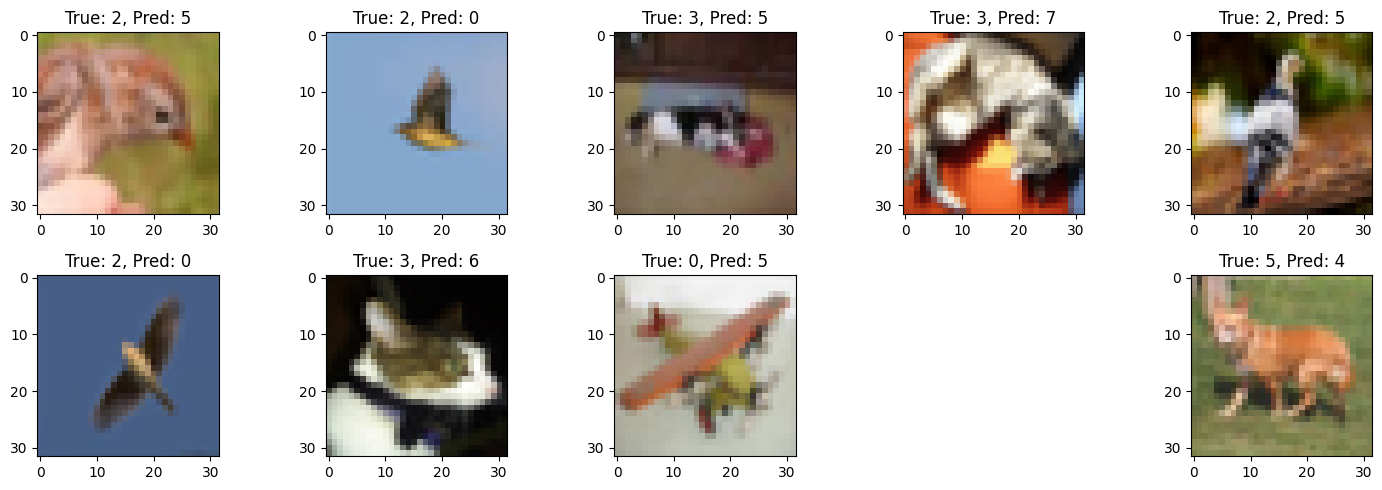

In [22]:
#image Misclassification
misclassified_idx = np.where(y_pred != y_true)[0]
sample_idx = np.random.choice(misclassified_idx, size=10, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(sample_idx):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], interpolation='nearest')
    plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}')
    plt.tight_layout()

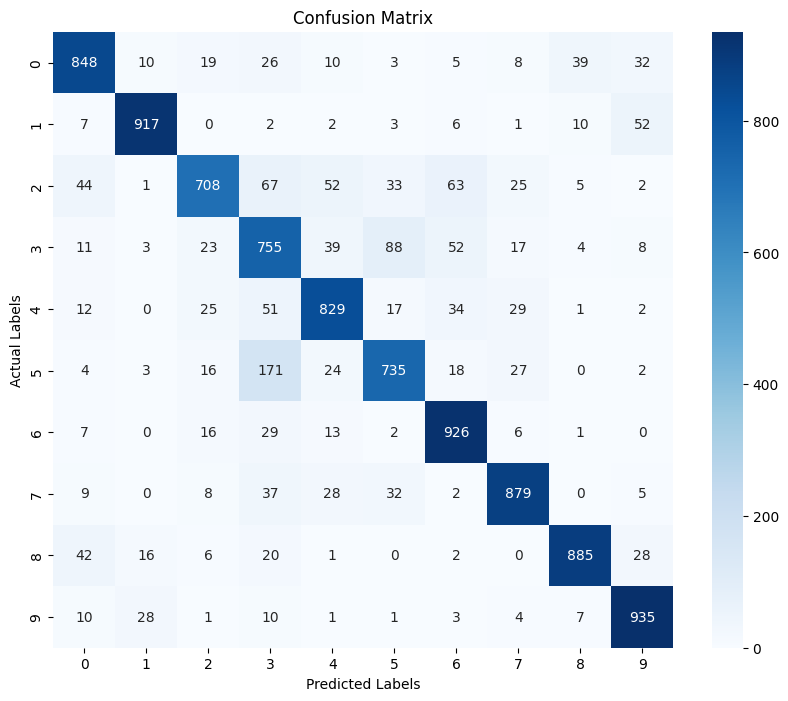

In [23]:

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()


Summary of Findings

The Model achieved an overall accuracy of 84% on the CIFAR-10 dataset.
High precision and recall were observed in easily distinguishable classes like 'Automobile' and 'Ship'.

Conclusions:


The model performs well on distinct categories but struggles with classes that share common features or have significant variation within the class.

Recommendations for Improvement:

Explore Deeper Architectures to capture more complex features within images.
Optimize Hyperparameters: Particularly learning rate and dropout rates, to fine-tune model performance by leveraging pre-trained models to boost accuracy, especially for complex classes.